In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import re
pd.set_option("display.max_rows", None, "display.max_columns", None)


In [36]:
from google.colab import drive
drive.mount('/content/gdrive')
file_path = '/content/brain_stroke.csv'
strokedata_df = pd.read_csv(file_path)

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


### **Project Goals**

My name is Miller Dickerson and my project is currently titled Gender & Age Disparities in Hypertension and Stroke: A Data-Driven Analysis. I will be investigating a data set related to hypertension, high BMI, stroke incidence, and/or average glucose level in the United States. I am interested in seeing correlations between patients having hypertension, high BMI, and/or high average glucose levels and it resulting in stroke or heart attack. Sex-based differences, age, and lifestyle differences will also be investigated. The website in which the analysis is located can be found [HERE](https://github.com/millerdickerson/millerdickerson.github.io)

### **Table 1: Stroke Data**

This table is from a CSV file downloaded from Kaggle ([link to Kaggle dataset](https://www.kaggle.com/datasets/zzettrkalpakbal/full-filled-brain-stroke-dataset/data)), but the data is orignally from an electronic health record controlled by McKinsey & Company ([link to EHR/Healthcare Hackathon Source](https://datahack.analyticsvidhya.com/contest/mckinsey-analytics-online-hackathon/#About)). This was a part of their healthcare hackathon in 2018 and this dataset is accessible as a free dataset repository. The dataset contains information about 29,072 patients having 12 common
variables. The variables are age, gender, marital status, patient identifier, work type, residence type (urban or rural), heart disease condition (binary attribute), body mass index (BMI), smoking status, average glucose level, and hypertension status (binary attribute). I will be answering questions such as, “Is there a sex based difference regarding hypertension, heart disease, and stroke?”, “What age groups are affected most by hypertension and stroke prevelence?”, “How frequently does hypertension result in stroke?” and “Is there any correlation between various patient demographics and hypertension prevelence?”

In [3]:
strokedata_df.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
2,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
3,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
4,Male,81.0,0,0,Yes,Private,Urban,186.21,29.0,formerly smoked,1


In [4]:
print(strokedata_df.columns)
strokedata_df = strokedata_df.loc[:, ~strokedata_df.columns.isin(["ever_married", "work_type"])]
strokedata_df = strokedata_df.reset_index(drop=True)

#dropping ever married variable and work type variable as they are not needed for what we will be exploring

Index(['gender', 'age', 'hypertension', 'heart_disease', 'ever_married',
       'work_type', 'Residence_type', 'avg_glucose_level', 'bmi',
       'smoking_status', 'stroke'],
      dtype='object')


In [5]:
counts=strokedata_df['stroke'].value_counts()
print(counts)
#248 people in the data set had a stroke (1 indicates stroke, 0 indicates no stroke)

stroke
0    4733
1     248
Name: count, dtype: int64


In [6]:
hyp_counts=strokedata_df['hypertension'].value_counts()
print(hyp_counts)
#479 people in the data set had hypertension (1 indicates hypertension and 0 indicates no hypertension)

hypertension
0    4502
1     479
Name: count, dtype: int64


In [7]:
def replace_empty_with_NAN(entry):
    entry = str(entry)
    if re.search("–", entry) != None:
        return np.nan
    elif re.search('="0"',entry) != None:
        return np.nan
    elif re.search('="0.00"', entry) != None:
        return np.nan
    return entry

In [8]:
for col in strokedata_df.columns:
    strokedata_df[col] = strokedata_df[col].apply(replace_empty_with_NAN)

In [9]:
strokedata_df.dtypes
#needs to be formatted

gender               object
age                  object
hypertension         object
heart_disease        object
Residence_type       object
avg_glucose_level    object
bmi                  object
smoking_status       object
stroke               object
dtype: object

In [10]:
lst_of_col = ["heart_disease", "hypertension", "stroke"]

for col in lst_of_col:
    strokedata_df[col] = strokedata_df[col].astype('bool')


In [11]:
lst_of_col = ["avg_glucose_level", "bmi", "age"]

for col in lst_of_col:
    strokedata_df[col] = strokedata_df[col].astype('float64')
strokedata_df.dtypes

#changed dtypes for proper formatting

gender                object
age                  float64
hypertension            bool
heart_disease           bool
Residence_type        object
avg_glucose_level    float64
bmi                  float64
smoking_status        object
stroke                  bool
dtype: object

In [12]:
# Create a dictionary to store the counts.
stroke_counts = {}

# Loop through each row in the data.
for index, row in strokedata_df.iterrows():
    # Get the gender and stroke values.
    gender = row["gender"]
    stroke = row["stroke"]

    # If the gender is not already in the dictionary, add it.
    if gender not in stroke_counts:
        stroke_counts[gender] = {}

    # If the stroke is not already in the dictionary for the gender, add it.
    if stroke not in stroke_counts[gender]:
        stroke_counts[gender][stroke] = 0

    # Increment the count for the stroke.
    stroke_counts[gender][stroke] += 1

# Print the counts.
for gender, strokes in stroke_counts.items():
    print(f"{gender}:")
    for stroke, count in strokes.items():
        print(f"\t{stroke}: {count}")

Male:
	True: 2074
Female:
	True: 2907


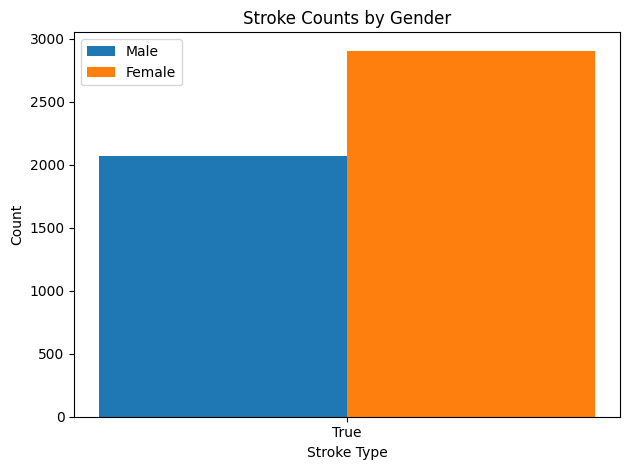

In [13]:
import matplotlib.pyplot as plt

# Create a dictionary to store the counts.
stroke_counts = {}

# Loop through each row in the data.
for index, row in strokedata_df.iterrows():
    # Get the gender and stroke values.
    gender = row["gender"]
    stroke = row["stroke"]

    # If the gender is not already in the dictionary, add it.
    if gender not in stroke_counts:
        stroke_counts[gender] = {}

    # If the stroke is not already in the dictionary for the gender, add it.
    if stroke not in stroke_counts[gender]:
        stroke_counts[gender][stroke] = 0

    # Increment the count for the stroke.
    stroke_counts[gender][stroke] += 1

# Plot the counts.
bar_width = 0.35
x_offset = 0

for gender, strokes in stroke_counts.items():
    stroke_names = list(strokes.keys())
    counts = list(strokes.values())

    x = [i + x_offset for i in range(len(stroke_names))]
    plt.bar(x, counts, label=gender, width=bar_width)
    x_offset += bar_width

# Add labels and title.
plt.xticks([i + (x_offset - bar_width) / 2 for i in range(len(stroke_names))], stroke_names)
plt.xlabel("Stroke Type")
plt.ylabel("Count")
plt.title("Stroke Counts by Gender")

# Add legend and show the plot.
plt.legend()
plt.tight_layout()
plt.show()

#females seem to have more strokes


In [14]:
strokedata_df.describe()
#used to get averages and counts of float64 data, average age was 43.42, average glucose level was 105.94, and average BMI was 28.50

,age,avg_glucose_level,bmi
count,4981.000000,4981.000000,4981.000000
mean,43.419859,105.943562,28.498173
std,22.662755,45.075373,6.790464
min,0.080000,55.120000,14.000000
25%,25.000000,77.230000,23.700000
50%,45.000000,91.850000,28.100000
75%,61.000000,113.860000,32.600000
max,82.000000,271.740000,48.900000


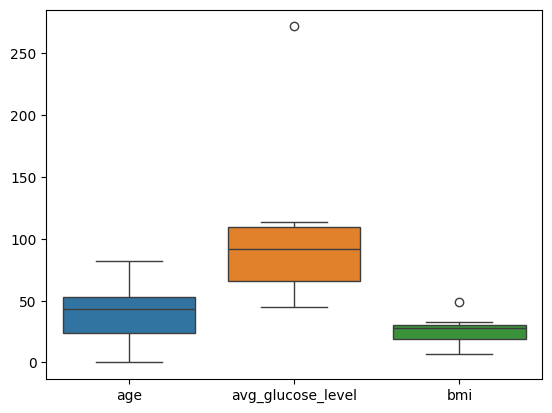

In [15]:
import seaborn as sns

sns.boxplot(data=strokedata_df.describe().drop(index=['count']))
plt.show()

high_bmi_stroke
No     3056
Yes    1925
Name: count, dtype: int64
Percentage of 'Yes': 38.65%
Percentage of 'No': 61.35%


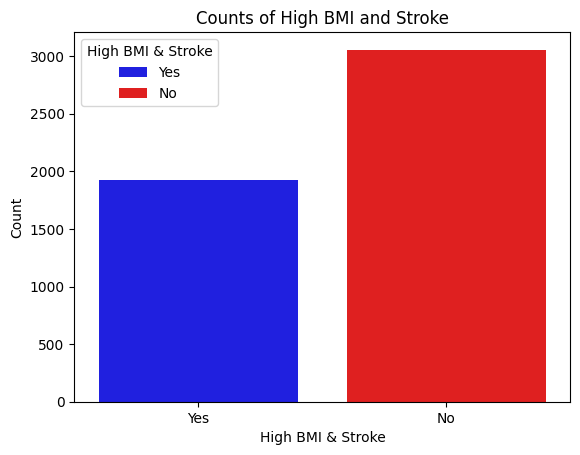

In [16]:
# Create a new column 'high_bmi_stroke' using a lambda function
strokedata_df['high_bmi_stroke'] = strokedata_df.apply(lambda row: 'Yes' if row['bmi'] >= 30 and row['stroke'] == 1 else 'No', axis=1)

count_high_bmi_stroke = strokedata_df['high_bmi_stroke'].value_counts()

print(count_high_bmi_stroke)
percentage_high_bmi_stroke = count_high_bmi_stroke / len(strokedata_df) * 100

print("Percentage of 'Yes': {:.2f}%".format(percentage_high_bmi_stroke['Yes']))
print("Percentage of 'No': {:.2f}%".format(percentage_high_bmi_stroke['No']))

# Plot the counts of 'high_bmi_stroke'
sns.countplot(data=strokedata_df, x='high_bmi_stroke', hue='high_bmi_stroke', palette=['blue', 'red'])
plt.xlabel('High BMI & Stroke')
plt.ylabel('Count')
plt.title('Counts of High BMI and Stroke')
plt.legend(title='High BMI & Stroke', labels=['Yes', 'No'])
plt.show()
#this shows the number of individuals that had high BMI (30 or higher) that had a stroke. A BMI of 30 or greater is the classification for obesity. There were 1925 indiviuals that were obese and had a stroke which is about 39%.

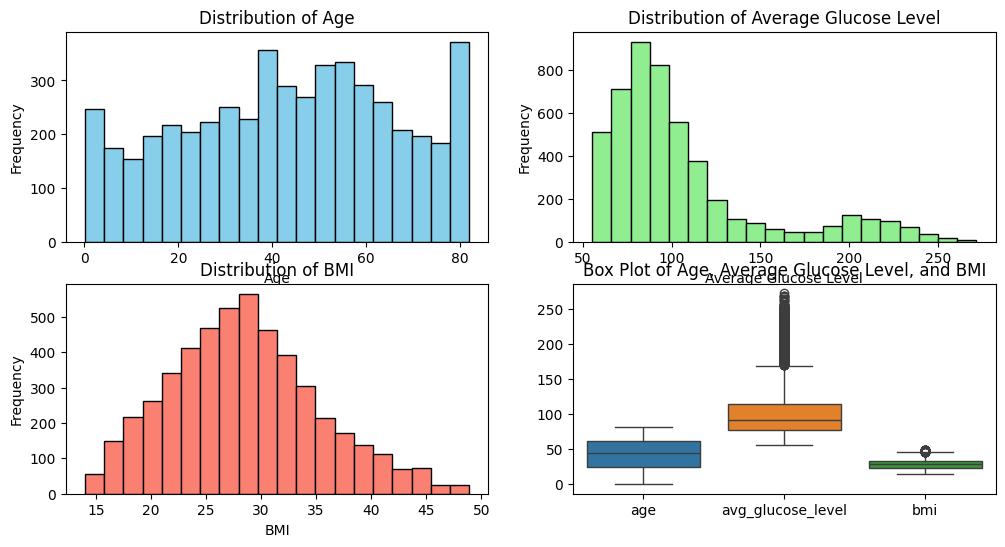

In [17]:
# Histograms for numerical columns
plt.figure(figsize=(12, 6))
plt.subplot(2, 2, 1)
plt.hist(strokedata_df['age'], bins=20, color='skyblue', edgecolor='black')
plt.title('Distribution of Age')
plt.xlabel('Age')
plt.ylabel('Frequency')

plt.subplot(2, 2, 2)
plt.hist(strokedata_df['avg_glucose_level'], bins=20, color='lightgreen', edgecolor='black')
plt.title('Distribution of Average Glucose Level')
plt.xlabel('Average Glucose Level')
plt.ylabel('Frequency')

plt.subplot(2, 2, 3)
plt.hist(strokedata_df['bmi'], bins=20, color='salmon', edgecolor='black')
plt.title('Distribution of BMI')
plt.xlabel('BMI')
plt.ylabel('Frequency')

# Box plots for numerical columns
plt.subplot(2, 2, 4)
sns.boxplot(data=strokedata_df[['age', 'avg_glucose_level', 'bmi']])
plt.title('Box Plot of Age, Average Glucose Level, and BMI')
plt.show()

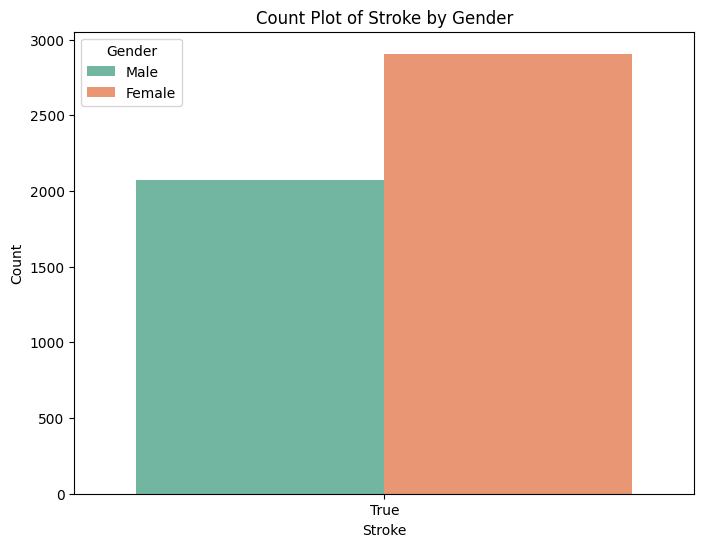

In [18]:
# Count plot of 'stroke' by 'gender'
plt.figure(figsize=(8, 6))
sns.countplot(data=strokedata_df, x='stroke', hue='gender', palette='Set2')
plt.title('Count Plot of Stroke by Gender')
plt.xlabel('Stroke')
plt.ylabel('Count')
plt.legend(title='Gender')
plt.show()

In [19]:
# Create the new column 'high_bmi_stroke' for females only using a lambda function
strokedata_df['female_high_bmi_stroke'] = strokedata_df.apply(lambda row: 'Yes' if row['gender'] == 'Female' and row['bmi'] >= 30 and row['stroke'] == 1 else 'No' if row['gender'] == 'Female' else 'Male', axis=1)
count_female_high_bmi_stroke = strokedata_df['female_high_bmi_stroke'].value_counts()

print(count_female_high_bmi_stroke)
percentagefemale_high_bmi_stroke = count_female_high_bmi_stroke / len(strokedata_df) * 100

print("Percentage of 'Yes': {:.2f}%".format(percentagefemale_high_bmi_stroke['Yes']))
print("Percentage of 'No': {:.2f}%".format(percentagefemale_high_bmi_stroke['No']))


female_high_bmi_stroke
Male    2074
No      1815
Yes     1092
Name: count, dtype: int64
Percentage of 'Yes': 21.92%
Percentage of 'No': 36.44%


In [ ]:
sns.countplot(data=strokedata_df, x='female_high_bmi_stroke',order=['Yes', 'No'], hue='stroke', palette="husl", )
plt.xlabel('Females with High BMI & Stroke')
plt.ylabel('Count')
plt.title('Counts of Females with High BMI and Stroke')
plt.legend(title='Stroke', labels=['Yes', 'No'])
plt.show()
#this shows the amount of females with high BMI and stroke

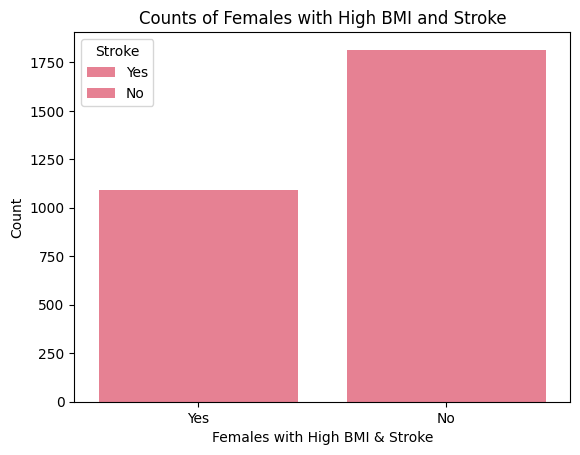

In [29]:
sns.countplot(data=strokedata_df, x='female_high_bmi_stroke',order=['Yes', 'No'], hue='stroke', palette="husl" )
plt.xlabel('Females with High BMI & Stroke')
plt.ylabel('Count')
plt.title('Counts of Females with High BMI and Stroke')
plt.legend(title='Stroke', labels=['Yes', 'No'])
plt.show()
#this shows the amount of females with high BMI and stroke

In [21]:
# Create the new column 'high_bmi_stroke' for males only using a lambda function
strokedata_df['male_high_bmi_stroke'] = strokedata_df.apply(lambda row: 'Yes' if row['gender'] == 'Male' and row['bmi'] >= 30 and row['stroke'] == 1 else 'No' if row['gender'] == 'Male' else 'Female', axis=1)
count_male_high_bmi_stroke = strokedata_df['male_high_bmi_stroke'].value_counts()

print(count_male_high_bmi_stroke)
percentagemale_high_bmi_stroke = count_male_high_bmi_stroke / len(strokedata_df) * 100

print("Percentage of 'Yes': {:.2f}%".format(percentagemale_high_bmi_stroke['Yes']))
print("Percentage of 'No': {:.2f}%".format(percentagemale_high_bmi_stroke['No']))

male_high_bmi_stroke
Female    2907
No        1241
Yes        833
Name: count, dtype: int64
Percentage of 'Yes': 16.72%
Percentage of 'No': 24.91%


<ipython-input-22-b8d62dc0719d>:1: UserWarning: The palette list has more values (2) than needed (1), which may not be intended.
  sns.countplot(data=strokedata_df, x='male_high_bmi_stroke', hue='stroke', palette=['blue', 'red'], order=['Yes', 'No'])


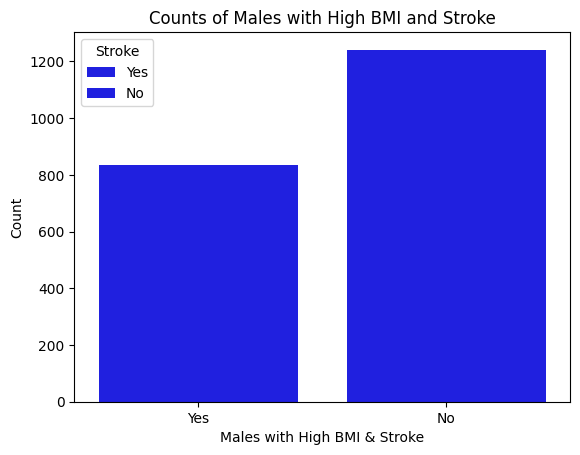

In [22]:
sns.countplot(data=strokedata_df, x='male_high_bmi_stroke', hue='stroke', palette=['blue', 'red'], order=['Yes', 'No'])
plt.xlabel('Males with High BMI & Stroke')
plt.ylabel('Count')
plt.title('Counts of Males with High BMI and Stroke')
plt.legend(title='Stroke', labels=['Yes', 'No'])
plt.show()
#this shows the amount of males with high BMI and stroke

In [38]:
strokedata_df.describe()

,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,4981.000000,4981.000000,4981.000000,4981.000000,4981.000000,4981.000000
mean,43.419859,0.096165,0.055210,105.943562,28.498173,0.049789
std,22.662755,0.294848,0.228412,45.075373,6.790464,0.217531
min,0.080000,0.000000,0.000000,55.120000,14.000000,0.000000
25%,25.000000,0.000000,0.000000,77.230000,23.700000,0.000000
50%,45.000000,0.000000,0.000000,91.850000,28.100000,0.000000
75%,61.000000,0.000000,0.000000,113.860000,32.600000,0.000000
max,82.000000,1.000000,1.000000,271.740000,48.900000,1.000000


In [44]:
strokedata_df["hypertension_stroke"] = strokedata_df.apply(lambda row: 'Yes' if row['hypertension'] == 1 and row['stroke'] == 1 else 'No', axis=1)
count_hyp_with_stroke = strokedata_df["hypertension_stroke"].value_counts()
print(count_hyp_with_stroke)
# going to check because I don't think this is correct

hypertension_stroke
No     4915
Yes      66
Name: count, dtype: int64


In [40]:
df_new.describe()

count     4981
unique       2
top         No
freq      4915
dtype: object

For the next part of the project I plan to build a model that will predict stroke incidence based on age, glucose levels, bmi, smoker status, heart disease, and hypertension.

In [42]:
df_new

0        No
1        No
2        No
3       Yes
4        No
5       Yes
6        No
7        No
8       Yes
9        No
10       No
11       No
12      Yes
13       No
14      Yes
15       No
16       No
17      Yes
18       No
19       No
20       No
21       No
22       No
23       No
24      Yes
25       No
26      Yes
27       No
28       No
29      Yes
30       No
31      Yes
32       No
33       No
34       No
35       No
36       No
37      Yes
38      Yes
39       No
40       No
41      Yes
42       No
43      Yes
44       No
45       No
46      Yes
47      Yes
48       No
49      Yes
50      Yes
51       No
52      Yes
53       No
54       No
55       No
56      Yes
57      Yes
58      Yes
59       No
60       No
61       No
62      Yes
63       No
64       No
65       No
66       No
67      Yes
68       No
69       No
70       No
71       No
72       No
73       No
74       No
75       No
76      Yes
77       No
78       No
79       No
80       No
81      Yes
82       No
83  

In [24]:
%%shell

jupyter nbconvert --to html '/content/gdrive/MyDrive/Colab Notebooks/Project Milestone 1.ipynb'

[NbConvertApp] Converting notebook /content/gdrive/MyDrive/Colab Notebooks/Project Milestone 1.ipynb to html
[NbConvertApp] Writing 632432 bytes to /content/gdrive/MyDrive/Colab Notebooks/Project Milestone 1.html
